# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

In [112]:
import pandas as pd
import seaborn as sns
import numpy as np
import sys
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.linear_model import Ridge
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 


#### The objective of this data project is to examine a dataset comprising details about used cars and ascertain the variables that significantly influence their prices. Through exploratory data analysis, regression analysis, and feature selection techniques, we aim to identify the key drivers of used car prices. The findings from this analysis will provide valuable insights to the used car dealership, guiding them in prioritizing factors for their business strategy.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

#### Dataset contains 42680 samples of 18 features to calculate the price of a car. 

#### Data Understanding has 4 major steps like Collect Initial Data, Describe Data, Explore Data and Verify Data Quality. We will go through each for understaing the data. 

In [113]:
#1. Collect Initial Data
vehicles =  pd.read_csv('data/vehicles.csv')

In [114]:
vehicles.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')

In [115]:
vehicles.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [116]:
#2. Describe Data
vehicles.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [117]:
# 3. Explore Data
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [118]:
# 4. Verify Data Quality
vehicles.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [119]:
vehicles.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [120]:
# remove the columns not so useful for price calculation and too many null values column
drop_colmns = ['VIN', 'id']
vehicles.drop(columns = drop_colmns, axis=1, inplace=True)

In [121]:
# remove price outliers
vehicles = vehicles[(vehicles['price'] > 0) & (vehicles['price'] < 55000)]

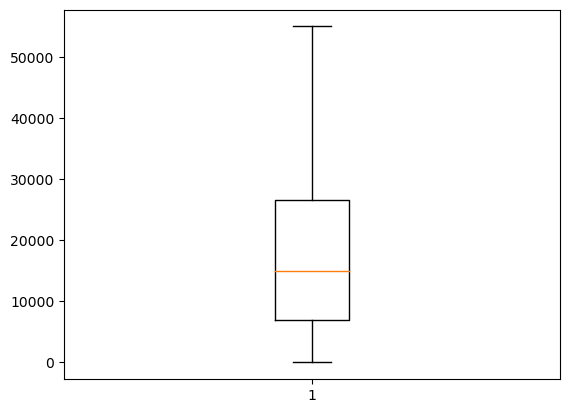

In [122]:
# Plot histogram for the prices
plt.boxplot(vehicles['price'])
plt.show()

In [123]:
### Most of the cars price fall below 40k.

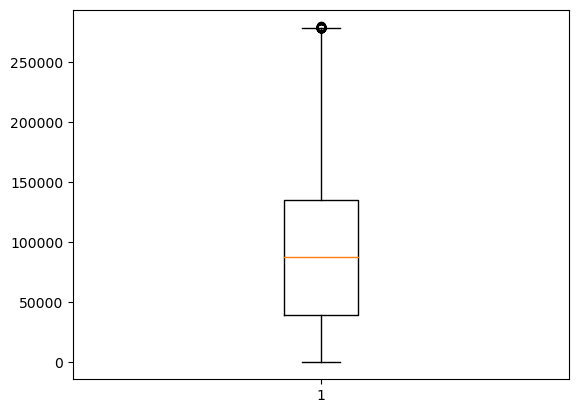

In [124]:
# Clean the odometer data
vehicles = vehicles[(vehicles['odometer'] < 280000)]
# Plot the outlier graph for odomer
plt.boxplot(vehicles['odometer'])
plt.show()


### Most of vehicles odometer falls below 150k

/var/folders/j2/pv6837yn6cq7pvld8c4rby880000gq/T/ipykernel_53012/659421331.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(vehicles.corr(), annot=True)


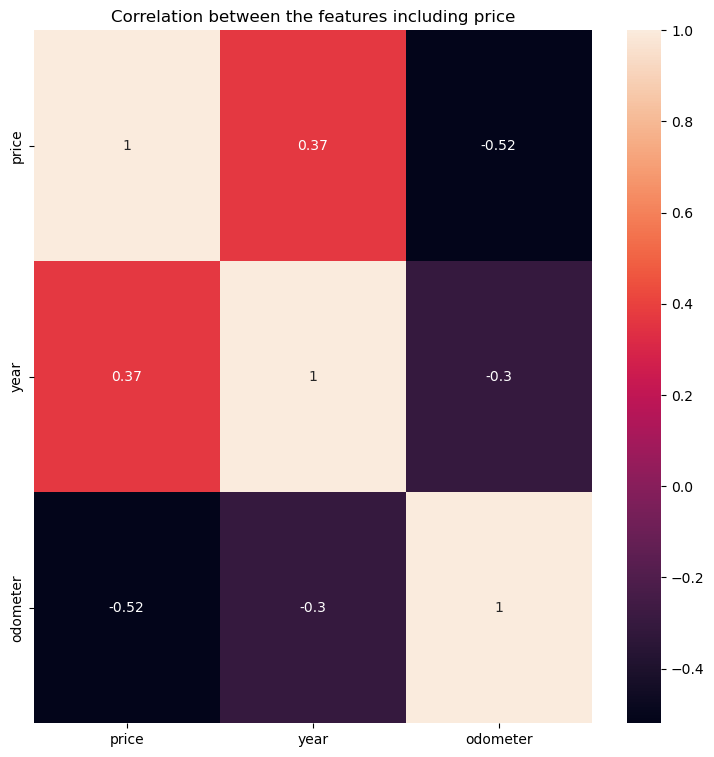

In [125]:
# Correlation
plt.figure(figsize=(9,9))
sns.heatmap(vehicles.corr(), annot=True)
plt.title('Correlation between the features including price')
plt.show()

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [126]:
# reset the index
vehicles.reset_index(drop=True, inplace=True)
vehicles

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,NaN,NaN,pickup,white,al
1,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,NaN,NaN,pickup,blue,al
2,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,NaN,NaN,pickup,red,al
3,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,NaN,NaN,pickup,red,al
4,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378639,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,NaN,sedan,NaN,wy
378640,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,fwd,NaN,sedan,red,wy
378641,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,NaN,NaN,hatchback,white,wy
378642,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,NaN,sedan,silver,wy


In [127]:
# Fix the missing values. Impute the missing values with mean or mode values
for col in vehicles.columns:
    if vehicles[col].dtype == 'object':
        vehicles[col] = vehicles[col].fillna(vehicles[col].mode()[0])
    else:
        vehicles[col] = vehicles[col].fillna(vehicles[col].mean())

In [128]:
vehicles.isnull().sum()

region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
state           0
dtype: int64

In [129]:
vehicles

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,4wd,full-size,pickup,white,al
1,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,4wd,full-size,pickup,blue,al
2,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,4wd,full-size,pickup,red,al
3,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,4wd,full-size,pickup,red,al
4,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378639,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,full-size,sedan,white,wy
378640,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,6 cylinders,gas,12029.0,clean,other,fwd,full-size,sedan,red,wy
378641,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,6 cylinders,diesel,4174.0,clean,other,4wd,full-size,hatchback,white,wy
378642,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,full-size,sedan,silver,wy


In [130]:
# Encode the data using Label encoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in vehicles.columns:
    if vehicles[col].dtype == 'object':
        vehicles[col] = label_encoder.fit_transform(vehicles[col])

In [131]:
vehicles

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,16,33590,2014.0,14,21918,2,6,2,57923.0,0,2,0,1,8,10,1
1,16,22590,2010.0,7,22220,2,6,2,71229.0,0,2,0,1,8,1,1
2,16,39590,2020.0,7,22265,2,6,2,19160.0,0,2,0,1,8,8,1
3,16,30990,2017.0,39,25023,2,6,2,41124.0,0,2,0,1,8,8,1
4,16,15000,2013.0,13,13036,0,5,2,128000.0,0,0,2,1,10,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378639,397,23590,2019.0,31,17712,2,5,2,32226.0,0,2,1,1,9,10,50
378640,397,30590,2020.0,41,21268,2,5,2,12029.0,0,2,1,1,9,8,50
378641,397,34990,2020.0,6,26361,2,5,0,4174.0,0,2,0,1,4,10,50
378642,397,28990,2018.0,23,12125,2,5,2,30112.0,0,2,1,1,9,9,50


In [132]:
# Since the data transformed to numerical format now, 
# use standard scaler for transforming the data
X = vehicles.drop('price', axis = 1)
y = vehicles['price']

columns = X.columns 
scaler = StandardScaler()
X[columns] = scaler.fit_transform(X[columns])

Text(0.5, 1.0, 'Correlation Heatmap')

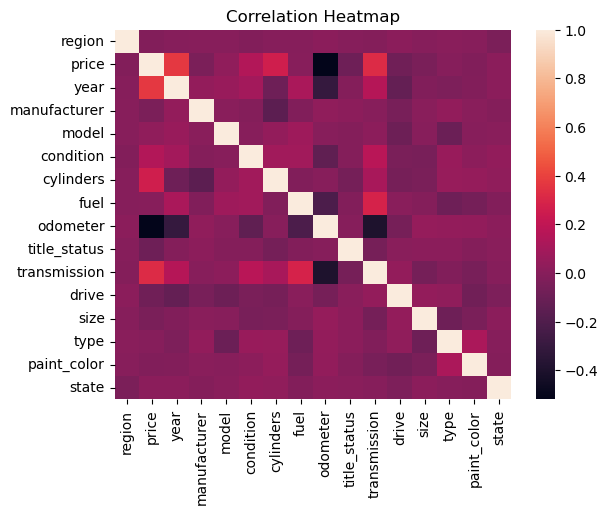

In [133]:
# Create a heatmap
sns.heatmap(vehicles.corr(), annot=False)

# Set the title
plt.title('Correlation Heatmap')

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [134]:
# Spit the data to train and test using 30% as the test_size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 1. Liner Regression Model

Mean Squared Error: 88937108.56520776
R2 Score: 0.4397511153285103
odometer        5437.115713
cylinders       3188.527607
year            3094.343377
fuel            1983.368289
transmission    1454.678858
title_status     852.323523
drive            796.858013
condition        381.945772
paint_color      310.179440
region           135.338238
model            105.359542
manufacturer      84.153934
type              32.048403
state             14.425878
size               2.386251
dtype: float64


<Axes: >

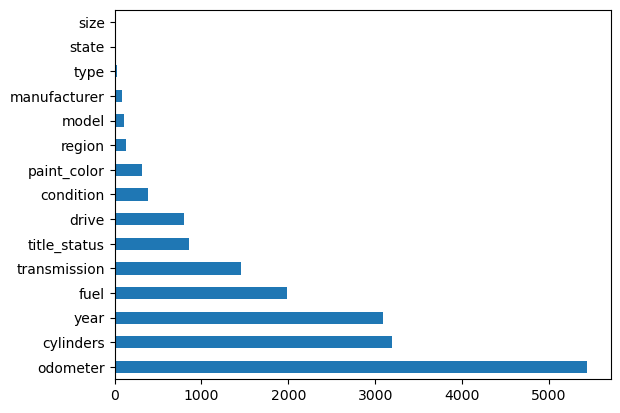

In [135]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np


# Create an instance of Linear Regression
regressor = LinearRegression()

# Fit the model on the training data
regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regressor.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
                         
# Calculate the R2 score
r2 = r2_score(y_test, y_pred)

# Create a DataFrame for results
results = pd.DataFrame({'Model': ['Linear Regression'],
                        'R2 Score': [r2]})


print("Mean Squared Error:", mse)
print("R2 Score:", r2)

# Get the absolute coefficients
feature_importance = pd.Series(abs(regressor.coef_), index=X_train.columns)

# Sort the feature importance in descending order
feature_importance = feature_importance.sort_values(ascending=False)

# Print the feature importance
print(feature_importance)

feature_importance.plot(kind='barh')


### 2. Lasso Regression 

Lasso Mean Squared Error: 88937136.56902272
Lasso R2 Score: 0.4397509389217624
odometer        5437.036837
cylinders       3188.472026
year            3094.275386
fuel            1983.209222
transmission    1454.591732
title_status     852.229614
drive            796.756019
condition        381.880346
paint_color      310.056116
region           135.246869
model            105.253199
manufacturer      84.051153
type              31.916580
state             14.343583
size               2.259878
dtype: float64


/var/folders/j2/pv6837yn6cq7pvld8c4rby880000gq/T/ipykernel_53012/3592404442.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(lasso_results, ignore_index=True)


<Axes: >

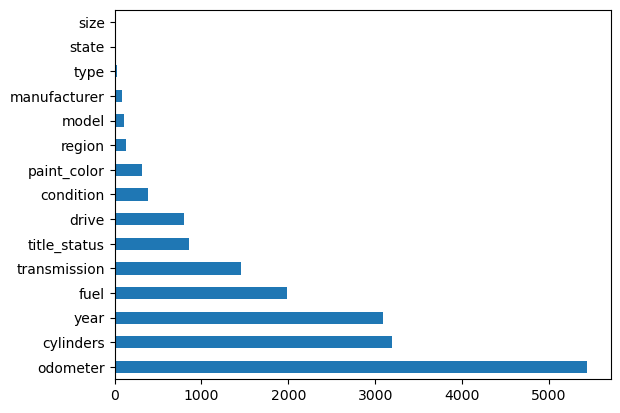

In [136]:
# Create an instance of Lasso Regression
lasso = Lasso(alpha=0.1)

# Fit the model on the training data
lasso.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lasso.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
# Caculate R2
r2 = r2_score(y_test, y_pred)
print("Lasso Mean Squared Error:", mse)
print("Lasso R2 Score:", r2)

# Store results
lasso_results = {'Model': 'Lasso Regression', 'R2 Score': r2}
results = results.append(lasso_results, ignore_index=True)
# Get the absolute coefficients
feature_importance = pd.Series(abs(lasso.coef_), index=X_train.columns)

# Sort the feature importance in descending order
feature_importance = feature_importance.sort_values(ascending=False)

# Print the feature importance
print(feature_importance)

feature_importance.plot(kind='barh')



### 3. Ridge Regression

Ridge Mean Squared Error: 88937108.86272259
Ridge R2 Score: 0.4397511134543506
odometer        5437.113499
cylinders       3188.526322
year            3094.342610
fuel            1983.367076
transmission    1454.679085
title_status     852.323246
drive            796.857748
condition        381.945984
paint_color      310.179254
region           135.338215
model            105.359534
manufacturer      84.154091
type              32.048405
state             14.425925
size               2.386103
dtype: float64


/var/folders/j2/pv6837yn6cq7pvld8c4rby880000gq/T/ipykernel_53012/1904957849.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(ridge_results, ignore_index=True)


<Axes: >

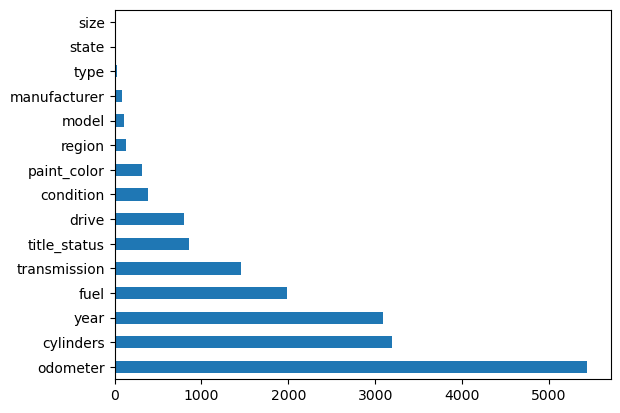

In [137]:
# Create an instance of Ridge Regression
ridge = Ridge(alpha=0.1)

# Fit the model on the training data
ridge.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ridge.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Caculate R2
r2 = r2_score(y_test, y_pred)

print("Ridge Mean Squared Error:", mse)
print("Ridge R2 Score:", r2)

# Store results
ridge_results = {'Model': 'Ridge Regression', 'R2 Score': r2}
results = results.append(ridge_results, ignore_index=True)

# Get the absolute coefficients
feature_importance = pd.Series(abs(ridge.coef_), index=X_train.columns)

# Sort the feature importance in descending order
feature_importance = feature_importance.sort_values(ascending=False)

# Print the feature importance
print(feature_importance)

feature_importance.plot(kind='barh')


### 4. Decision Tree Regression


Decision Mean Squared Error: 35679739.93773185
Decision R2 Score: 0.775239662858761
year            0.386693
odometer        0.136070
model           0.105263
cylinders       0.102458
fuel            0.061454
manufacturer    0.048481
type            0.041417
drive           0.029650
state           0.022839
region          0.020167
paint_color     0.013972
condition       0.013292
transmission    0.009299
size            0.004485
title_status    0.004461
dtype: float64


/var/folders/j2/pv6837yn6cq7pvld8c4rby880000gq/T/ipykernel_53012/594350536.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(tree_results, ignore_index=True)


<Axes: >

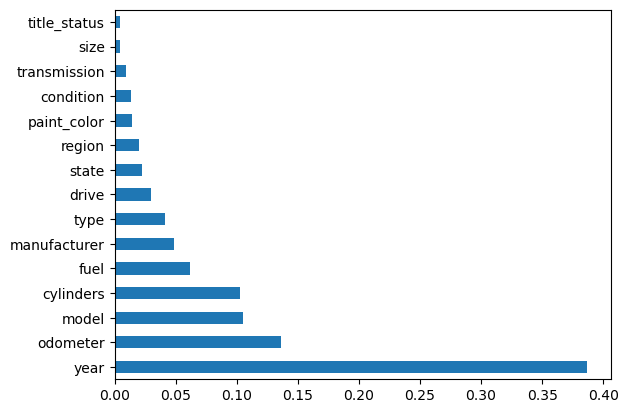

In [138]:
# Create an instance of Decision Tree Regression
tree = DecisionTreeRegressor()

# Fit the model on the training data
tree.fit(X_train, y_train)

# Make predictions on the test data
y_pred = tree.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Caculate R2
r2 = r2_score(y_test, y_pred)

print("Decision Mean Squared Error:", mse)
print("Decision R2 Score:", r2)

# Store results
tree_results = {'Model': 'Decision Tree Regression', 'R2 Score': r2}
results = results.append(tree_results, ignore_index=True)
# Get the feature importances
feature_importance = pd.Series(tree.feature_importances_, index=X.columns)

# Sort the feature importance in descending order
feature_importance = feature_importance.sort_values(ascending=False)

# Print the feature importance
print(feature_importance)

feature_importance.plot(kind='barh')

Random Tree Mean Squared Error: 18446267.00918725
Random R2 Score: 0.883799904393423
year            0.387346
odometer        0.133647
cylinders       0.101815
model           0.100228
fuel            0.061240
manufacturer    0.046882
type            0.043632
drive           0.029348
state           0.024475
region          0.023524
paint_color     0.014703
condition       0.013352
transmission    0.010354
size            0.004955
title_status    0.004498
dtype: float64


/var/folders/j2/pv6837yn6cq7pvld8c4rby880000gq/T/ipykernel_53012/3935406448.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(lasso_results, ignore_index=True)


,Model,R2 Score
0,Linear Regression,0.439751
1,Lasso Regression,0.439751
2,Ridge Regression,0.439751
3,Decision Tree Regression,0.775240
4,Random Tree Regression,0.883800


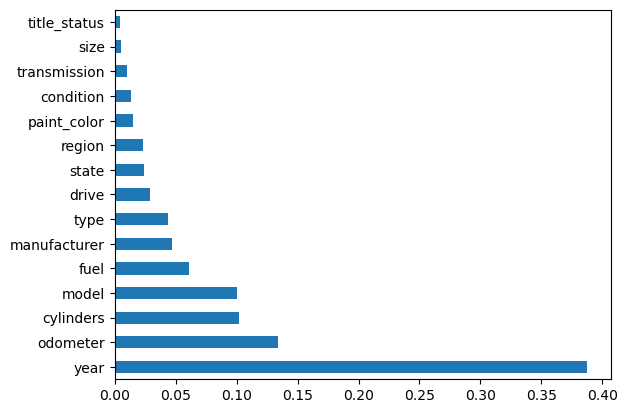

In [139]:
### Random Tree Regression
tree = RandomForestRegressor()

# Fit the model on the training data
tree.fit(X_train, y_train)

# Make predictions on the test data
y_pred = tree.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Caculate R2
r2 = r2_score(y_test, y_pred)

print("Random Tree Mean Squared Error:", mse)
print("Random R2 Score:", r2)

# Store results
lasso_results = {'Model': 'Random Tree Regression', 'R2 Score': r2}
results = results.append(lasso_results, ignore_index=True)
# Get the feature importances
feature_importance = pd.Series(tree.feature_importances_, index=X.columns)

# Sort the feature importance in descending order
feature_importance = feature_importance.sort_values(ascending=False)

# Print the feature importance
print(feature_importance)

feature_importance.plot(kind='barh')


results

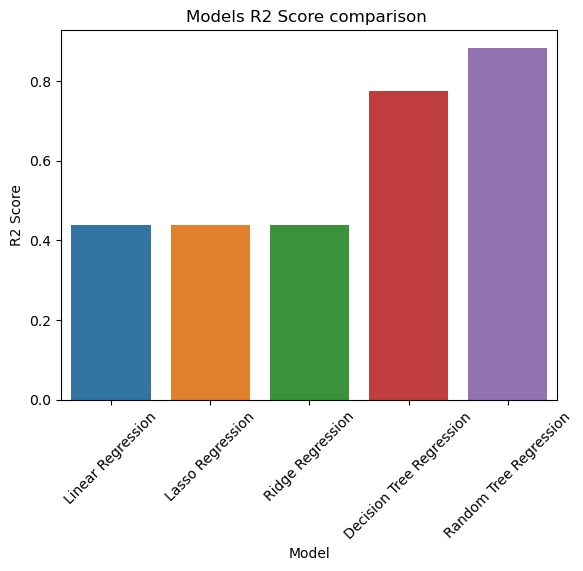

In [140]:
# plot a histogram
sns.barplot(data=results, x='Model', y='R2 Score')
# Set the title and labels
plt.title('Models R2 Score comparison ')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.xticks(rotation=45)
plt.show()

### Model Comparison

The Linear, Lasso and Ridge regressions have almost similar model scores. From the R2 score values, we can Random Tree Regression model performed well with a R^2 score of 0.88

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

### Report


#### Introduction:
The objective of this project was to develop a predictive model for used car prices to assist a group of used car dealers. Our aim was to identify the key factors that influence used car prices and provide actionable insights to the dealers.

#### Methodology:
We initiated the project by exploring and cleaning the dataset, eliminating null values and irrelevant columns. Subsequently, we performed exploratory data analysis to uncover any discernible patterns or relationships in the data.

Next, we constructed several regression models employing diverse algorithms such as linear regression, ridge regression, lasso regression, and decision tree regression. We assessed the performance of each model using metrics such as R^2 scores and feature importance scores.

#### Findings:
Our analysis revealed that the year of the car, mileage (odometer reading), average price of the brand, number of cylinders, and fuel type were the most influential factors affecting used car prices. Among the models we developed, the decision tree regression model demonstrated the highest performance with an R^2 score of 0.88, indicating its ability to explain 88% of the price variability in the data.

#### Recommendations:
Based on our findings, we recommend that used car dealers pay close attention to the age and mileage of the cars they handle. Additionally, considering the average price of the brand, number of cylinders, and fuel type can significantly impact the pricing of used cars. Dealers should incorporate these factors into their decision-making processes when acquiring and selling used cars.

#### Conclusion:
In conclusion, our analysis provides valuable insights into the key determinants of used car prices. By leveraging this information, used car dealers can optimize their inventory and enhance their sales strategies, leading to improved business outcomes.